In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 为了在jupyter notebook中作图需要用到这个命令
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# 幸存总数，1表示幸存
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# 缺失值处理方法

+ 如果数据集很多，但是却有很少的缺失值，可以删除掉带缺失值的哪一行
+ 如果该属性相对学习来说不是很重要，就可以对缺失值副均值或者众数

In [5]:
train_data.Embarked.dropna().mode().values #求众数

array(['S'], dtype=object)

In [6]:
# 使用众数填充缺失值
train_data.Embarked[train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values

D:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
# Cabin缺失值填充为U0
train_data['Cabin'] = train_data.Cabin.fillna('U0')

In [8]:
# 使用随机森林预测age缺失的值
from sklearn.ensemble import RandomForestRegressor
age_df = train_data[['Age', 'Survived', 'Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:, 1:]
Y = age_df_notnull.values[:, 0]
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X, Y)
predictAges = RFR.predict(age_df_isnull.values[:, 1:])
train_data.loc[train_data['Age'].isnull(), ['Age']] = predictAges

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
# 性别与生存的关系
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [11]:
# 船舱等级与生存的关系
train_data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

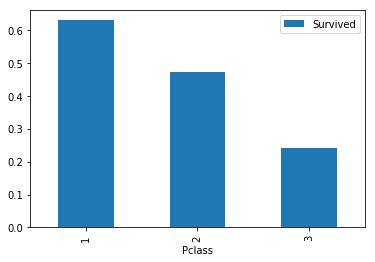

In [12]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()

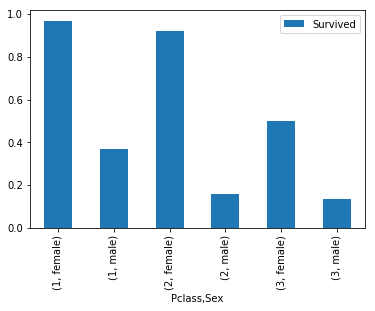

In [13]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [14]:
# 不同船舱里男女的生存率
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

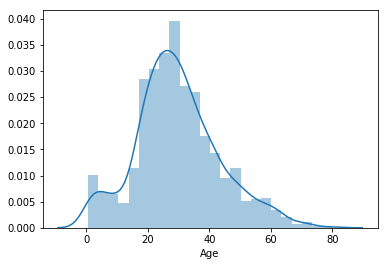

In [15]:
sns.distplot(train_data.Age)

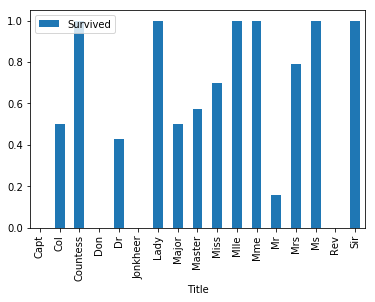

In [16]:
# 称呼与生存率的关系x
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['Title'], train_data['Sex'])
train_data[['Title', 'Survived']].groupby(['Title']).mean().plot.bar()

In [17]:
# 有无兄弟姐妹和存活与否的关系
train_data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

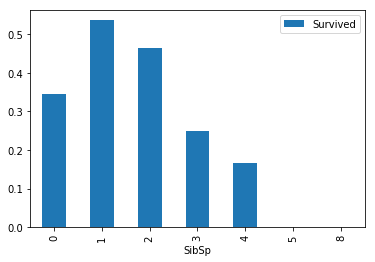

In [18]:
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar()

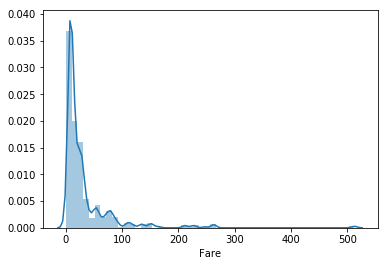

In [19]:
# 票价与生存率的关系
sns.distplot(train_data.Fare)

In [20]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
# 港口与存活与否的关系
train_data.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

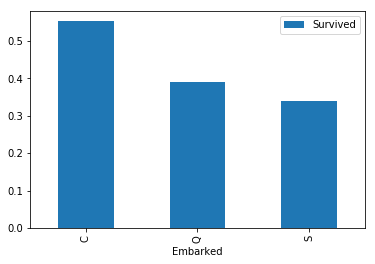

In [22]:
train_data[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar()

## 将Embarked用one-hot表示 

In [23]:
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'], axis=1, inplace=True)

In [24]:
embark_dummies = train_data[['S', 'C', 'Q']]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


# 定量转化（数值归一化）

In [25]:
from sklearn import preprocessing
assert np.size(train_data.Age) == 891
scaler = preprocessing.StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data.Age.values.reshape(-1, 1))

In [26]:
train_data.Age_scaled.head()

0   -0.557284
1    0.607639
2   -0.266053
3    0.389216
4    0.389216
Name: Age_scaled, dtype: float64

In [27]:
# 将Fare分成块
train_data['Fare_bin'] = pd.qcut(train_data['Fare'], 5) # 这里将数据分成5块
train_data.Fare_bin.head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [28]:
# 将分块后的数据factorize化
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]
train_data.Fare_bin_id.values

array([0, 1, 2, 1, 2, 2, 1, 3, 3, 4, 3, 4, 2, 4, 0, 3, 4, 3, 3, 0, 4, 3,
       2, 4, 3, 4, 0, 1, 2, 2, 4, 1, 0, 2, 1, 1, 0, 2, 3, 3, 2, 3, 2, 1,
       2, 2, 3, 0, 3, 3, 4, 0, 1, 4, 1, 4, 2, 0, 4, 1, 0, 1, 1, 4, 4, 3,
       2, 2, 2, 2, 2, 1, 1, 3, 1, 0, 2, 2, 4, 3, 2, 2, 0, 1, 2, 3, 4, 2,
       1, 2, 2, 0, 1, 3, 0, 2, 4, 1, 4, 4, 2, 2, 1, 2, 2, 2, 0, 0, 2, 4,
       1, 3, 2, 2, 3, 2, 0, 3, 1, 4, 1, 2, 4, 3, 1, 3, 0, 0, 4, 0, 2, 0,
       3, 4, 3, 3, 4, 1, 2, 1, 3, 0, 3, 0, 3, 4, 0, 4, 4, 3, 3, 1, 2, 3,
       0, 1, 0, 2, 2, 1, 3, 3, 0, 2, 4, 3, 1, 4, 4, 1, 4, 4, 3, 2, 4, 0,
       4, 4, 3, 0, 1, 3, 4, 4, 4, 1, 3, 4, 3, 2, 3, 3, 0, 4, 4, 1, 0, 2,
       0, 3, 2, 1, 0, 0, 2, 2, 3, 3, 0, 4, 0, 3, 0, 3, 0, 1, 2, 4, 1, 2,
       2, 3, 2, 2, 1, 2, 2, 0, 3, 4, 1, 0, 3, 4, 2, 0, 4, 4, 2, 3, 3, 3,
       2, 0, 0, 1, 0, 3, 1, 4, 0, 2, 4, 3, 3, 3, 1, 1, 1, 4, 0, 4, 1, 0,
       0, 2, 4, 0, 1, 1, 4, 0, 3, 4, 0, 1, 0, 0, 4, 3, 0, 0, 2, 2, 4, 2,
       2, 2, 3, 0, 1, 1, 3, 2, 2, 4, 0, 1, 4, 1, 0,

In [29]:
# 将分块后的数据dummies化
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin'])
fare_bin_dummies_df.rename(columns=lambda x:'Fare_' + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,Age_scaled,Fare_bin,Fare_bin_id,"(-0.001, 7.854]","(7.854, 10.5]","(10.5, 21.679]","(21.679, 39.688]","(39.688, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,-0.557284,"(-0.001, 7.854]",0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0.607639,"(39.688, 512.329]",1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,-0.266053,"(7.854, 10.5]",2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0.389216,"(39.688, 512.329]",1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0.389216,"(7.854, 10.5]",2,0,1,0,0,0


# 特征工程

In [31]:
train_df_org = pd.read_csv('train.csv')
test_df_org = pd.read_csv('test.csv')
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


## (1)Embarked

In [32]:
# 由于Embarked缺失值不多，所以可以用众数填充
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)

In [33]:
combined_train_test[['Embarked']].columns[0]

'Embarked'

In [34]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [35]:
# 将Embarked特征进行factorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]

# 使用dummies获取one-hot编码
# prefix修改前缀名
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'], prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,0,1,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,0,0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,1,0,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,0,0


## (2)Sex

In [36]:
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)

## (3)Name

In [37]:
# 首先从名字中提取各种称呼
import re
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

In [ ]:
# title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

In [39]:
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]
title_dummies_df = pd.get_dummies(combined_train_test['Title'], prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test, title_dummies_df], axis=1)

In [40]:
# 增加名字的长度特征
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

## Fare 

In [41]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 25 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null int64
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Embarked_0     1309 non-null uint8
Embarked_1     1309 non-null uint8
Embarked_2     1309 non-null uint8
Sex_0          1309 non-null uint8
Sex_1          1309 non-null uint8
Title          1309 non-null int64
Title_0        1309 non-null uint8
Title_1        1309 non-null uint8
Title_2        1309 non-null uint8
Title_3        1309 non-null uint8
Title_4        1309 non-null uint8
Title_5        1309 non-null uint8
Name_length    1309 non-null int64
dtypes: float

In [42]:
combined_train_test['Fare'].groupby(combined_train_test['Pclass']).mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [43]:
# 使用均值填充Fare的缺失值
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

In [44]:
# 将团体票价分配到每个人身上
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

In [45]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'], 5)

combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]

fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test, fare_bin_dummies_df], axis=1)
combined_train_test.drop(['Fare_bin'], axis=1, inplace=True)

## Pclass

In [46]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

## (6)Parch and SibSp

### 由前面的分析可以知道，亲友的数量没有或者太多会影响到Survived，所以可以将二者合并到FamilySize这里

In [48]:
# 返回值类型
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

In [49]:
combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
# 由于在这里combined_train_test['Family_Size']是一维向量，因此map和apply是等价的
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

In [50]:
# 将标签的值标准化
from sklearn.preprocessing import LabelEncoder
le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],prefix = combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test,family_size_dummies_df],axis = 1)

In [51]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,1,0,0,0,0,2,2,0,0,1
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,1,0,0,0,2,2,0,0,1
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,0,1,0,...,0,0,1,0,0,1,1,0,1,0
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,1,0,0,0,2,2,0,0,1
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,0,0,0,...,0,0,1,0,0,1,1,0,1,0


## (7)Age

### 因为Age缺失值比较多，所以综合Sex、Title、Pclass等其他没有缺失值得项，使用机器学习算法来预测Age。

In [52]:
combined_train_test[
 ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']]

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
0,22.0,0,0,0,23,2,2,7.250000,0,0
1,38.0,1,1,1,51,2,2,35.641650,1,1
2,26.0,0,1,2,22,1,1,7.925000,2,0
3,35.0,0,1,1,44,2,2,26.550000,1,1
4,35.0,0,0,0,24,1,1,8.050000,2,0
5,NaN,2,0,0,16,1,1,8.458300,2,0
6,54.0,0,0,0,23,1,1,25.931250,3,1
7,2.0,0,0,3,30,5,0,4.215000,4,0
8,27.0,0,1,1,49,3,2,3.711100,4,0
9,14.0,1,1,1,35,2,2,15.035400,3,2


In [53]:
missing_age_df = combined_train_test[
 ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']]
missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

In [54]:
x = pd.DataFrame([[1,2,3],[4,5,6]])
type(combined_train_test['Sex'])

pandas.core.series.Series

In [55]:
missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,NaN,2,0,0,16,1,1,8.4583,2,0
17,NaN,0,0,0,28,1,1,13.0000,3,2
19,NaN,1,1,1,23,1,1,7.2250,4,0
26,NaN,1,0,0,23,1,1,7.2250,4,0
28,NaN,2,1,2,29,1,1,7.8792,0,0


### 建立Age得预测模型，我们可以多模型预测，然后再做模型得融合，提高预测精度

In [56]:

# 集成方法
from sklearn import ensemble
from sklearn import model_selection
# gdbt的回归类
from sklearn.ensemble import GradientBoostingRegressor
# 随机森林的回归类
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train,missing_age_test):
    # 训练特征集
    missing_age_X_train = missing_age_train.drop(['Age'],axis = 1)
    # 训练标签集
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'],axis = 1)
    
    # gdbt
    # random_state为随机种子，可以保证同一模型每次结果都一样
    gbm_reg = GradientBoostingRegressor(random_state = 42)
    # 自动调参器
    # 最优化参数的取值
    gbm_reg_param_grid = {'n_estimators':[2000],'max_depth':[4],'learning_rate':[0.01],'max_features':[3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('最好的参数:' + str(gbm_reg_grid.best_params_))
    print('最好的评价分数:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:,'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print('前4个预测值为:')
    print(missing_age_test['Age_GB'][:4])
    
    # 随机森林
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train,missing_age_Y_train)
    print('最好的参数:' + str(rf_reg_grid.best_params_))
    print('最好的评价分数:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    # 融合两个模型
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    
    # 用两个模型预测值的平均值作为融合模型的预测值
    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

### loc()通过行标签索引数据，iloc()通过行号索引数据

In [57]:
# 利用融合模型预测的结果填充Age的缺失值
combined_train_test.loc[combined_train_test.Age.isnull(),'Age'] = fill_missing_age(missing_age_train,missing_age_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    6.0s remaining:    6.0s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    6.1s finished
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


最好的参数:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
最好的评价分数:-130.2956775989383
GB Train Error for "Age" Feature Regressor:-64.65669617233556


D:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.


前4个预测值为:
5     35.773942
17    31.489153
19    34.113840
26    28.621281
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    3.3s remaining:    3.3s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    3.4s finished
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


最好的参数:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
最好的评价分数:-119.09495605170706
RF Train Error for "Age" Feature Regressor-96.06031484477619


D:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


5     33.459421
17    33.076798
19    34.855942
26    28.146718
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     30.000675
17    30.000675
19    30.000675
26    30.000675
Name: Age, dtype: float64


D:\Program Files (x86)\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## (8)Ticket

In [58]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)

# 如果要提取数字信息，则也可以这样做，现在我们对数字票单纯地分为一类。
# combined_train_test['Ticket_Number'] = combined_train_test['Ticket'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# combined_train_test['Ticket_Number'].fillna(0, inplace=True)

# 将 Ticket_Letter factorize
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

## (9)Cabin

In [59]:
# 因为此特征缺失值较多，因此分为有无两类
combined_train_test.loc[combined_train_test.Cabin.isnull(),'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x:0 if x == 'U0' else 1)

# 特征空间的相关性分析

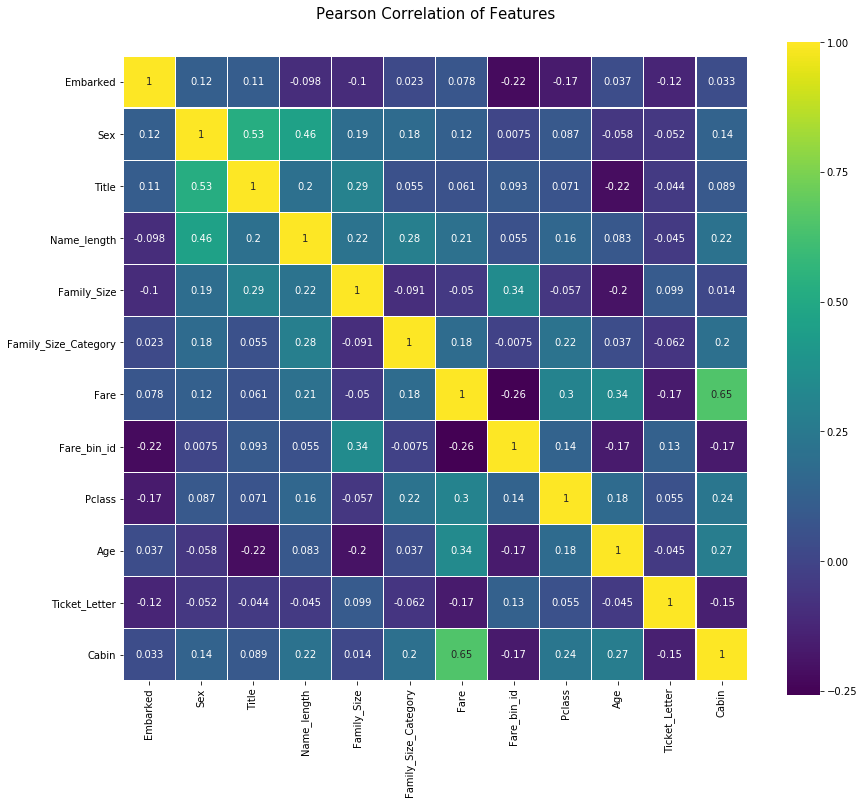

In [60]:
Correlation = pd.DataFrame(combined_train_test[['Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass', 'Age', 'Ticket_Letter', 'Cabin']])
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# 输入模型前的一些数据处理：

In [61]:
# 将Age和fare进行标准化((X-mean)/std )
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare']])
combined_train_test[['Age','Fare']] = scale_age_fare.transform(combined_train_test[['Age','Fare']])

In [62]:
combined_train_test[['Age', 'Fare']].head()

,Age,Fare
0,-0.613832,-0.554177
1,0.628562,1.541869
2,-0.303234,-0.504344
3,0.395613,0.870667
4,0.395613,-0.495116


In [64]:

# 弃掉一些无用的特征
combined_data_backup = combined_train_test
combined_train_test.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'Title', 'Fare_bin_id', 
                       'Parch', 'SibSp', 'Family_Size_Category', 'Ticket'],axis = 1,inplace = True)
combined_train_test.head()

,Age,Cabin,Fare,Pclass,Survived,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,...,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Family_Size,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,-0.613832,0,-0.554177,0,0,1,0,0,1,0,...,1,0,0,0,0,2,0,0,1,0
1,0.628562,1,1.541869,1,1,0,1,0,0,1,...,0,1,0,0,0,2,0,0,1,1
2,-0.303234,0,-0.504344,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,2
3,0.395613,1,0.870667,1,1,1,0,0,0,1,...,0,1,0,0,0,2,0,0,1,3
4,0.395613,0,-0.495116,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,3


In [65]:
# 将训练数据和测试数据分开

train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

titanic_train_data_X = train_data.drop(['Survived'],axis = 1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis = 1)

In [66]:
titanic_train_data_X.shape

(891, 26)

# 6. 模型融合及测试
## (1) 利用不同的模型对特征进行筛选，选择较为重要的特征：

In [67]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
# 极其随机森林
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# 决策树
from sklearn.tree import DecisionTreeClassifier

In [68]:
list(titanic_train_data_X)

['Age',
 'Cabin',
 'Fare',
 'Pclass',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Sex_0',
 'Sex_1',
 'Title_0',
 'Title_1',
 'Title_2',
 'Title_3',
 'Title_4',
 'Title_5',
 'Name_length',
 'Fare_0',
 'Fare_1',
 'Fare_2',
 'Fare_3',
 'Fare_4',
 'Family_Size',
 'Family_Size_Category_0',
 'Family_Size_Category_1',
 'Family_Size_Category_2',
 'Ticket_Letter']

In [69]:
def get_top_n_features(titanic_train_data_X,titanic_train_data_Y,top_n_features):
    # 随机森林
    rf_est = RandomForestClassifier(random_state = 0)
    rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
    rf_grid = model_selection.GridSearchCV(rf_est,rf_param_grid,n_jobs = 25,cv = 10, verbose=1)
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('最好的参数是：'+str(rf_grid.best_params_))
    print('最好的评价分数为：'+str(rf_grid.best_score_))
    print('训练集的分数为：'+str(rf_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    # rf_grid.best_estimator_.feature_importances_获得特征的重要性
    feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Features from RF Classifier')
    print(str(features_top_n_rf[:10]))

    # AdaBoost
    ada_est =AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
    ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': ada_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Feature from Ada Classifier:')
    print(str(features_top_n_ada[:10]))

    # ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [20]}
    et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
    et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best ET Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est =GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1], 'max_depth': [20]}
    gb_grid = model_selection.GridSearchCV(gb_est, gb_param_grid, n_jobs=25, cv=10, verbose=1)
    gb_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': gb_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split': [2, 4], 'max_depth': [20]}
    dt_grid = model_selection.GridSearchCV(dt_est, dt_param_grid, n_jobs=25, cv=10, verbose=1)
    dt_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': dt_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et, features_top_n_gb, features_top_n_dt], 
                               ignore_index=True).drop_duplicates()
    
    features_importance = pd.concat([feature_imp_sorted_rf, feature_imp_sorted_ada, feature_imp_sorted_et, 
                                   feature_imp_sorted_gb, feature_imp_sorted_dt],ignore_index=True)
    print('---------------------------------------------------------')
    print(features_top_n)
    print('---------------------------------------------------------')
    print(features_importance)
    print('---------------------------------------------------------')
    return features_top_n , features_importance

## (2)依据我们筛选的特征构建训练集和测试集

In [70]:
# 因为特征太多可能会产生过拟合且训练速度会变慢，因此选取我们想要的前n个特征
feature_to_pick = 30
feature_top_n, feature_importance = get_top_n_features(titanic_train_data_X, titanic_train_data_Y, feature_to_pick)
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    9.6s remaining:    5.1s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   10.7s finished


最好的参数是：{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
最好的评价分数为：0.8215488215488216
训练集的分数为：0.9831649831649831
Sample 10 Features from RF Classifier
2              Fare
0               Age
15      Name_length
9           Title_0
8             Sex_1
7             Sex_0
3            Pclass
21      Family_Size
25    Ticket_Letter
1             Cabin
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    3.0s remaining:    1.6s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    4.6s finished


Top N Features Best Ada Params:{'learning_rate': 0.01, 'n_estimators': 500}
Top N Features Best Ada Score:0.8159371492704826
Top N Features Ada Train Score:0.8204264870931538
Sample 10 Feature from Ada Classifier:
9                    Title_0
2                       Fare
21               Family_Size
7                      Sex_0
22    Family_Size_Category_0
3                     Pclass
1                      Cabin
8                      Sex_1
15               Name_length
0                        Age
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    2.3s remaining:    1.2s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    2.5s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best ET Score:0.8226711560044894
Top N Features ET Train Score:0.9730639730639731
Sample 10 Features from ET Classifier:
9                    Title_0
8                      Sex_1
7                      Sex_0
15               Name_length
0                        Age
2                       Fare
3                     Pclass
1                      Cabin
25             Ticket_Letter
22    Family_Size_Category_0
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    8.9s remaining:    4.8s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   11.3s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.7856341189674523
Top N Features GB Train Score:0.9966329966329966
Sample 10 Feature from GB Classifier:
9                    Title_0
2                       Fare
0                        Age
15               Name_length
21               Family_Size
3                     Pclass
22    Family_Size_Category_0
14                   Title_5
25             Ticket_Letter
23    Family_Size_Category_1
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Top N Features Best DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.7789001122334456
Top N Features DT Train Score:0.9584736251402918
Sample 10 Features from DT Classifier:
9                    Title_0
2                       Fare
0                        Age
15               Name_length
22    Family_Size_Category_0
3                     Pclass
14          

[Parallel(n_jobs=25)]: Using backend LokyBackend with 25 concurrent workers.
[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.0s finished


## (3)模型融合(Model Ensemble)
#### (3-1):Bagging
### Bagging 将多个模型，也就是多个基学习器的预测结果进行简单的加权平均或者投票。它的好处是可以并行地训练基学习器。Random Forest就用到了Bagging的思想。
#### (3-2): Boosting
### Boosting 的思想有点像知错能改，每个基学习器是在上一个基学习器学习的基础上，对上一个基学习器的错误进行弥补。我们将会用到的 AdaBoost，Gradient Boost 就用到了这种思想。
#### (3-3): Stacking
### Stacking是用新的次学习器去学习如何组合上一层的基学习器。如果把 Bagging 看作是多个基分类器的线性组合，那么Stacking就是多个基分类器的非线性组合。Stacking可以将学习器一层一层地堆砌起来，形成一个网状的结构。
### 相比来说Stacking的融合框架相对前面的二者来说在精度上确实有一定的提升，所以在下面的模型融合上，我们也使用Stacking方法。
#### (3-4): Blending
#### Blending 和 Stacking 很相似，但同时它可以防止信息泄露的问题。
#### Stacking框架融合:
### 这里我们使用了两层的模型融合，Level 1使用了：RandomForest、AdaBoost、ExtraTrees、GBDT、DecisionTree、KNN、SVM ，一共7个模型，Level 2使用了XGBoost使用第一层预测的结果作为特征对最终的结果进行预测

In [71]:

# 对每个基学习使用K-fold方法
from sklearn.model_selection import KFold

ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
NFOLDS = 7
kf = KFold(n_splits = NFOLDS,random_state = 0,shuffle = False)

def get_out_fold(clf,x_train,y_train,x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    # split（）函数将训练集分开，返回下标索引
    # enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    # reshape中-1表示默认，第二个参数是列数，-1则表示自动计算。
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

#### 构建不同的基学习器

In [72]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
rf = RandomForestClassifier(n_estimators=500, warm_start=True, max_features='sqrt',max_depth=6, 
                            min_samples_split=3, min_samples_leaf=2, n_jobs=-1, verbose=0)

ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)

et = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_depth=8, min_samples_leaf=2, verbose=0)

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.008, min_samples_split=3, min_samples_leaf=2, max_depth=5, verbose=0)

dt = DecisionTreeClassifier(max_depth=8)

knn = KNeighborsClassifier(n_neighbors = 2)

svm = SVC(kernel='linear', C=0.025)

In [73]:
# 将pandas转化为arrays

x_train = titanic_train_data_X.values # Creates an array of the train data
x_test = titanic_test_data_X.values # Creats an array of the test data
y_train = titanic_train_data_Y.values

In [74]:

rf_oof_train, rf_oof_test = get_out_fold(rf, x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_out_fold(ada, x_train, y_train, x_test) # AdaBoost 
et_oof_train, et_oof_test = get_out_fold(et, x_train, y_train, x_test) # Extra Trees
gb_oof_train, gb_oof_test = get_out_fold(gb, x_train, y_train, x_test) # Gradient Boost
dt_oof_train, dt_oof_test = get_out_fold(dt, x_train, y_train, x_test) # Decision Tree
knn_oof_train, knn_oof_test = get_out_fold(knn, x_train, y_train, x_test) # KNeighbors
svm_oof_train, svm_oof_test = get_out_fold(svm, x_train, y_train, x_test) # Support Vector

print("Training is complete")

D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
D:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:308: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
D:\Program Files (x86)\Anaconda\lib\site

Training is complete


## 利用xgboost，使用第一层的预测结果作为特征最终结果进行预测

In [75]:
x_train = np.concatenate((rf_oof_train, ada_oof_train, et_oof_train, gb_oof_train, dt_oof_train, knn_oof_train, svm_oof_train), axis=1)
x_test = np.concatenate((rf_oof_test, ada_oof_test, et_oof_test, gb_oof_test, dt_oof_test, knn_oof_test, svm_oof_test), axis=1)

In [77]:

from xgboost import XGBClassifier

gbm = XGBClassifier( n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.8, 
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

D:\Program Files (x86)\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [78]:

PassengerId = np.arange(predictions.shape[0])+892
StackingSubmission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predictions})
StackingSubmission.to_csv('./StackingSubmission.csv',index=False,sep=',')

In [ ]:
# 交叉验证
from sklearn.model_selection import cross_val_score
# k折交叉验证 计算AUC
scores = cross_val_score(gbm, x_train, y_train, scoring="roc_auc", cv=5)
scores.mean()